<a href="https://colab.research.google.com/github/salma-SABROU/Simple-Undercomplete-autoencoder/blob/main/Undercomplete_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Undercomplete autoencoder**


---



> MNIST est une base de données très populaire dans le domaine de l'apprentissage automatique. Elle contient un grand ensemble d'images en noir et blanc de chiffres manuscrits, allant de 0 à 9. Chaque image est au format 28x28 pixels, ce qui signifie qu'elle contient 28 lignes et 28 colonnes de pixels.







In [34]:
import numpy as np
import tensorflow  as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

(x_train,_), (x_test,_)= mnist.load_data()
print(x_train[15][8])
print("**********************************************************************************************")
print(x_test[15][5])

[  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 251 252 252
 252 252 250 214   0   0   0   0   0   0]
**********************************************************************************************
[  0   0   0   0   0   0   0   0 102 142 203 203 253 252 253 252 151  70
   0   0   0   0   0   0   0   0   0   0]




**1.   Normalisation des données :**

> Les valeurs des pixels des images sont normalisées en divisant par 255 pour les ramener dans la plage [0, 1].





In [35]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train[15][8])
print("**********************************************************************************************")
print(x_test[15][5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.24705882 0.41960785 0.6666667  0.9843137  0.9882353  0.9882353
 0.9882353  0.9882353  0.98039216 0.8392157  0.         0.
 0.         0.         0.         0.        ]
**********************************************************************************************
[0.         0.         0.         0.         0.         0.
 0.         0.         0.4        0.5568628  0.79607844 0.79607844
 0.99215686 0.9882353  0.99215686 0.9882353  0.5921569  0.27450982
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]




**2.   Réorganisation des données :**


> Les données d'entraînement et de test sont remodelées pour avoir une forme de (nombre d'exemples, 784), où 784 correspond à la taille des images MNIST (28x28 pixels).





In [36]:
print("len(x_train) == ",len(x_train))
print("x_train.shape[1:] == ",x_train.shape[1:])
print("np.prod(x_train.shape[1:]) == ",np.prod(x_train.shape[1:]))

dimensions_matrice = x_train.shape
print("dimensions_matrice : ",dimensions_matrice)

## Shape of the x_train is (60000, 784)
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
## Shape of the x_test is (10000,784)
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

dimensions_matrice = x_train.shape
print("dimensions_matrice : ",dimensions_matrice)

len(x_train) ==  60000
x_train.shape[1:] ==  (28, 28)
np.prod(x_train.shape[1:]) ==  784
dimensions_matrice :  (60000, 28, 28)
dimensions_matrice :  (60000, 784)




**3.   Définition de l'architecture de l'autoencodeur :**



> Ici, un modèle d'autoencodeur est créé avec trois couches. La première couche, input_l, est l'entrée, la deuxième couche, bottleneck, représente la couche cachée de l'encodeur avec 32 neurones et une fonction d'activation ReLU, et la troisième couche, output_l, est la sortie de l'autoencodeur avec une fonction d'activation sigmoid.



In [37]:
input_l=Input(shape=(784,))
bottleneck=Dense(32, activation='relu')(input_l)
output_l=Dense(784, activation='sigmoid')(bottleneck)




**4.   Création du modèle de l'autoencodeur et des encodeur/décodeur séparés :**



> Ici, trois modèles sont créés : l'autoencodeur complet, l'encodeur (qui extrait la représentation latente) et le décodeur (qui reconstruit les données).



In [38]:
autoencoder=Model(inputs=[input_l],outputs=[output_l])    ## Building the entire autoencoder

encoder=Model(inputs=[input_l],outputs=[bottleneck])    ## Building the encoder
encoded_input=Input(shape=(32,))

decoded=autoencoder.layers[-1](encoded_input)
decoder=Model(inputs=[encoded_input],outputs=[decoded])      ##Building the decoder




**5.   Compilation de l'autoencodeur :**



In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')




**6.   Entraînement de l'autoencodeur :**


> L'autoencodeur est entraîné sur les données d'entraînement (x_train) pour 50 époques avec un batch size de 256. Les données de test (x_test) sont utilisées pour la validation. L'objectif de l'entraînement est de minimiser la perte de reconstruction, de sorte que l'autoencodeur apprend à reconstruire les images MNIST à partir de leur représentation latente.





In [41]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1366 - val_loss: 0.1282
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1242 - val_loss: 0.1184
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1158 - val_loss: 0.1113
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1098 - val_loss: 0.1062
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1053 - val_loss: 0.1024
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1019 - val_loss: 0.0993
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0975 - val_loss: 0.0956
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0945
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0955 - val_los



**7.   Courbe de perte d'entraînement**



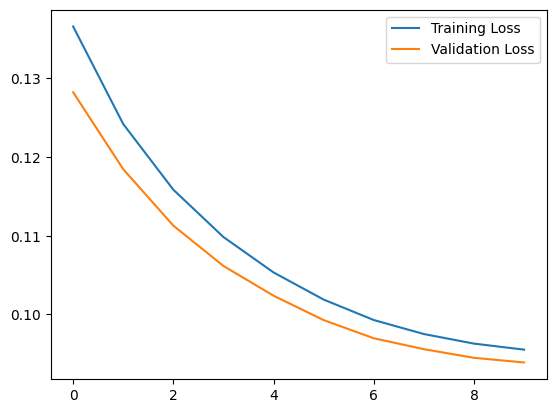

In [43]:
import matplotlib.pyplot as plt


plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()